In [1]:
from rules import *
from simulators import Simulator

from random import Random

from IPython.display import Markdown as md
import matplotlib.pyplot as plt

In [2]:
# 初始金额
START_CASH = 100
# 重复次数
SIMUTALOR_COUNT = 1000000
# 最多交易数
ITER_COUNT = 100
# 随机种子，用来复现某一次随机过程
seed = Random().random()
# 规则
rules = [
    # 当手持金额是0时，退出交易
     TerminateRule(lambda luck, step: step <= 0)
]
# 40%的概率赚10元
# 60%的概率赔5元
rules += ProbabilityRuleGenerator()\
    .new_rule(SimpleAddRule, 0.4, 10)\
    .new_rule(SimpleSubRule, 0.6, 6)

In [3]:
seed

0.5853745923062044

In [4]:
random = Random(seed)
simulators = [Simulator(START_CASH, rules, random) for _ in range(SIMUTALOR_COUNT)]
for simulator in simulators:
    for i in range(ITER_COUNT):
        simulator.simulate()
        
result_list = [s.result for s in simulators]

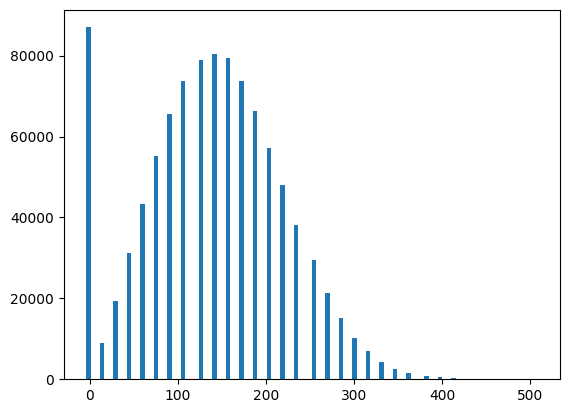

In [5]:
# 结果分布图
# 横坐标是所有交易完成后，所剩金额
# 纵坐标是有多少次重复实验结果分布在这个金额内
n_bin = 100
n, bins, container = plt.hist(result_list, bins=n_bin)

In [7]:
# 正收益率和负收益率的对比
pos_count = len([r for r in result_list if r > START_CASH])
neg_count = len([r for r in result_list if r < START_CASH])
pos_ratio = pos_count / SIMUTALOR_COUNT
neg_ratio = neg_count / SIMUTALOR_COUNT
md("正收益率=%.2f%%, 负收益率=%.2f%%" % (pos_ratio * 100, neg_ratio * 100))

正收益率=68.89%, 负收益率=31.11%

Text(0, 0.5, 'cash')

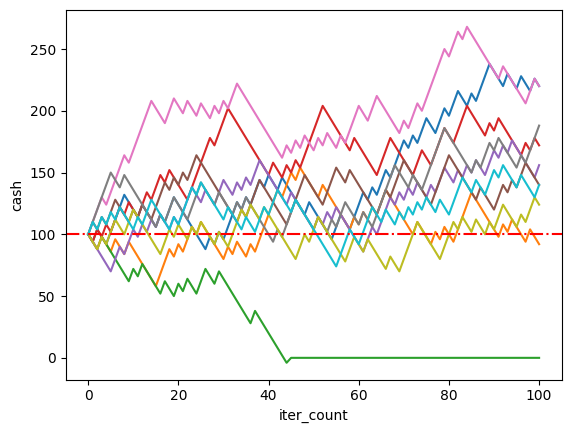

In [8]:
# 抽样分析
# 这里可以看到前10次的收益变化情况
# 横坐标是投资次数，纵坐标是当前的金额
SAMPLE_COUNT = 10

sample_list = [s.steps for s in simulators][:SAMPLE_COUNT]
for steps in sample_list:
    plt.plot(steps)

plt.axhline(y = 100, color = 'r', linestyle = '-.')
plt.xlabel("iter_count")
plt.ylabel("cash")

Text(0, 0.5, 'cash')

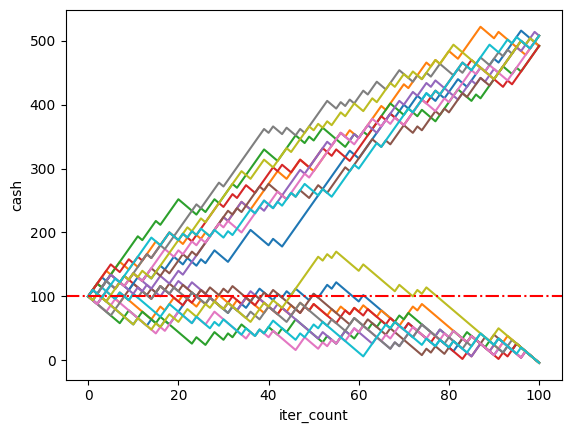

In [9]:
# 最好的10个结果和最差的10个结果
# 横坐标是投资次数，纵坐标是当前的金额
sort_by_result = sorted(list(simulators), key = lambda s: s.result)
sample_list = [s.steps for s in sort_by_result[:SAMPLE_COUNT] + sort_by_result[-SAMPLE_COUNT:]]

for steps in sample_list:
    plt.plot(steps)

plt.axhline(y = 100, color = 'r', linestyle = '-.')
plt.xlabel("iter_count")
plt.ylabel("cash")